<img src='./Images/Company_Logo.jpg' width='100%' align='center' />

---
<h1 align='center'>
GENERIC NAME LTD MOVIES ANALYSIS
</h1>

> **Authors**: Group 5
---

<h2 align='center'>
1. INTRODUCTION
</h2>

### Overview
Generic Name LTD is looking to expand into the movie industry. We in the data analysis division are looking to determine the best recommendations for which kind of movies to make.

We used data from the reputable movie ranking websites **IMDB**, **Rotten tomatoes** and **Box Office Mojo**. The data can be found [here](https://github.com/learn-co-curriculum/dsc-phase-2-project-v3) under **zipped data**

The conclusions we come to can be found [here](#conclusions)

### Business Problem

<img src="Images/Movie_Studio.jpg" width="100%" align="center" />

Generic Name LTD is looking to expand into the movie business. As the data analyst division, we have been tasked with exploring what types of films are currently doing well at the box office and translate those findings into actionable insights.

### Business Objective

We are looking to find:
* the best genres to make movies of
* the best runtime on average
* the best collaborators (writer, director, actor, etc)
* collaborators and genres that do well internationally
* best release times

---


<h2 align='center'>
2. DATA CLEANING AND PREPARATION
</h2>

We will be using data from the well known movie databases **Box Office Mojo**, **IMDB** and **Rotten Tomatoes** to come to our conclusions as well as the Python libraries **pandas** and **sqlite3** to help us access and analyze the data.

In this section, we will be cleaning the data by doing such things as:
* dropping duplicates if there are any
* filling null values with appropriate placeholders
* giving columns their appropriate data types, and
* creating new columns to hold extra information (feature engineering)

In [ ]:
import pandas as pd
import sqlite3
import numpy as np

conn = sqlite3.connect('./Data/im.db')

### a) Box Office Mojo

In [ ]:
BOM_Data = pd.read_csv('./Data/bom.movie_gross.csv')
BOM_Data.head()

The Box Office Mojo Data is made up of 5 columns:
* title
* studio
* domestic_gross
* foreign_gross
* year

These store information about various movie titles such as the studios that made them, the amount of money they made as well as the years they were released.

In [ ]:
BOM_Data[BOM_Data.duplicated()]

In [ ]:
BOM_Data.isna().sum()

The BOM data contains no duplicates. It has null values in the studio, domestic gross and foreign gross columns.

We will replace the null values in these columns as well as change the datatype of the `foreign_gross` column from text to number.

We will also add a new column called `total_earnings` that is the sum of the foreign and domestic gross.

In [ ]:
# Replace nulls in studio and domestic gross
BOM_Data['studio'] = BOM_Data['studio'].fillna('')
BOM_Data['domestic_gross'] = BOM_Data['domestic_gross'].fillna(0)

# Convert the foreign_gross column to a numeric column after replacing all commas with ''
BOM_Data['foreign_gross'] = pd.to_numeric(
    BOM_Data['foreign_gross'].astype(str).str.replace(',', ''),
    errors='coerce'
)

# Replace NaN in foreign_gross to 0
BOM_Data['foreign_gross'] = BOM_Data['foreign_gross'].fillna(0)

# Add a new column total_earnings
BOM_Data['total_earnings'] = BOM_Data['domestic_gross'] + BOM_Data['foreign_gross']

BOM_Data.head()

### b) IMDB

In [ ]:
pd.read_sql('''
    SELECT name
    FROM sqlite_master
    WHERE type = 'table';
''', conn)

The IMDB data has 8 tables:
* movie_basics
* directors
* known_for
* movie_akas
* movie_ratings
* persons
* principals
* writers

The tables have the following relationship:

<img src="Images/IMDB_ERD.png" width="50%" align="center" />

Let's examine each table.

In [ ]:
IMDB_Movie_Basics_Data = pd.read_sql('''
    SELECT *
    FROM movie_basics;
''', conn)
IMDB_Directors_Data = pd.read_sql('''
    SELECT *
    FROM directors;
''', conn)
IMDB_known_for_Data = pd.read_sql('''
    SELECT *
    FROM known_for;
''', conn)
IMDB_Movie_AKAs_Data = pd.read_sql('''
    SELECT *
    FROM movie_akas;
''', conn)
IMDB_Movie_Ratings_Data = pd.read_sql('''
    SELECT *
    FROM movie_ratings;
''', conn)
IMDB_Persons_Data = pd.read_sql('''
    SELECT *
    FROM persons;
''', conn)
IMDB_Principals_Data = pd.read_sql('''
    SELECT *
    FROM principals;
''', conn)
IMDB_Writers_Data = pd.read_sql('''
    SELECT *
    FROM writers;
''', conn)

#### i) movie_basics

In [ ]:
IMDB_Movie_Basics_Data.head()

In [ ]:
IMDB_Movie_Basics_Data[IMDB_Movie_Basics_Data.duplicated()]

In [ ]:
IMDB_Movie_Basics_Data.isna().sum()

`movie_basics` has no duplicates but some null values. Let's replace the null values.

In [ ]:
IMDB_Movie_Basics_Data['original_title'] = IMDB_Movie_Basics_Data['original_title'].fillna('')
# Fill empty runtime with the average
IMDB_Movie_Basics_Data['runtime_minutes'] = IMDB_Movie_Basics_Data['runtime_minutes'].fillna(IMDB_Movie_Basics_Data['runtime_minutes'].mean())
IMDB_Movie_Basics_Data['genres'] = IMDB_Movie_Basics_Data['genres'].fillna('')

IMDB_Movie_Basics_Data.isna().sum()

#### ii) directors

In [ ]:
IMDB_Directors_Data[IMDB_Directors_Data.duplicated()]

In [ ]:
IMDB_Directors_Data = IMDB_Directors_Data.drop_duplicates()
IMDB_Directors_Data[IMDB_Directors_Data.duplicated()]

In [ ]:
IMDB_Directors_Data.isna().sum()

#### iii) known_for

In [ ]:
IMDB_known_for_Data[IMDB_known_for_Data.duplicated()]

In [ ]:
IMDB_known_for_Data.isna().sum()

#### iv) movie_aka

In [ ]:
IMDB_Movie_AKAs_Data[IMDB_Movie_AKAs_Data.duplicated()]

In [ ]:
IMDB_Movie_AKAs_Data.isna().sum()

In [ ]:
IMDB_Movie_AKAs_Data.head()

In [ ]:
IMDB_Movie_AKAs_Data['region'] = IMDB_Movie_AKAs_Data['region'].fillna('')
IMDB_Movie_AKAs_Data['language'] = IMDB_Movie_AKAs_Data['language'].fillna('')
IMDB_Movie_AKAs_Data['types'] = IMDB_Movie_AKAs_Data['types'].fillna('')
IMDB_Movie_AKAs_Data['attributes'] = IMDB_Movie_AKAs_Data['attributes'].fillna('')
IMDB_Movie_AKAs_Data['is_original_title'] = IMDB_Movie_AKAs_Data['attributes'].fillna(0)

IMDB_Movie_AKAs_Data.isna().sum()

#### v) movie_ratings

In [ ]:
IMDB_Movie_Ratings_Data[IMDB_Movie_Ratings_Data.duplicated()]

In [ ]:
IMDB_Movie_Ratings_Data.isna().sum()

#### vi) persons

In [ ]:
IMDB_Persons_Data[IMDB_Persons_Data.duplicated()]

In [ ]:
IMDB_Persons_Data.isna().sum()

In [ ]:
IMDB_Persons_Data.head()

In [ ]:
IMDB_Persons_Data['birth_year'] = IMDB_Persons_Data['birth_year'].fillna(np.ceil(IMDB_Persons_Data['birth_year'].mean()))
IMDB_Persons_Data['death_year'] = IMDB_Persons_Data['death_year'].fillna(np.ceil(IMDB_Persons_Data['death_year'].mean()))
IMDB_Persons_Data['primary_profession'] = IMDB_Persons_Data['primary_profession'].fillna('')

IMDB_Persons_Data.isna().sum()

#### vii) principals

In [ ]:
IMDB_Principals_Data[IMDB_Principals_Data.duplicated()]

In [ ]:
IMDB_Principals_Data.isna().sum()

In [ ]:
IMDB_Principals_Data.head()

In [ ]:
IMDB_Principals_Data['job'] = IMDB_Principals_Data['job'].fillna('')
IMDB_Principals_Data['characters'] = IMDB_Principals_Data['characters'].fillna('')

IMDB_Principals_Data.isna().sum()

#### viii) writers

In [ ]:
IMDB_Writers_Data[IMDB_Writers_Data.duplicated()]

In [ ]:
IMDB_Writers_Data = IMDB_Writers_Data.drop_duplicates()

IMDB_Writers_Data[IMDB_Writers_Data.duplicated()]

In [ ]:
IMDB_Writers_Data.isna().sum()

### c) Rotten Tomatoes

The Rotten Tomatoes data is divided into two:
* `rt.movie_info.tsv`: stores data on movie info such as director, box office and runtime
* `rt.reviews.tsv`: stors data on movie reviews done by critics

In [ ]:
RT_Movie_Data = pd.read_csv('./Data/rt.movie_info.tsv', sep='\t')
RT_Movie_Data.head()

In [ ]:
RT_Review_Data = pd.read_csv('./Data/rt.reviews.tsv', sep='\t', encoding='latin1')
RT_Review_Data.head()

In [ ]:
RT_Movie_Data[RT_Movie_Data.duplicated()]

In [ ]:
RT_Review_Data[RT_Review_Data.duplicated()]

`RT_Movie_Data` contains no duplicates. However, `RT_Review_Data` contains 9 duplicates. We will drop them.

In [ ]:
RT_Review_Data = RT_Review_Data.drop_duplicates()
RT_Review_Data[RT_Review_Data.duplicated()]

In [ ]:
RT_Movie_Data.isna().sum()

In [ ]:
RT_Review_Data.isna().sum()

Both `RT_Review_Data` and `RT_Movie_Data` contain null values. We will replace them and convert columns to their appropriate data types.

> Note that for the `theater_date` and `dvd_date` columns, we have used the placeholder *1900-01-01* for null values.

> Note also that we have filled null values in the `rating` column depending on whether the record was classified as fresh or not in the `fresh` column. If fresh, we fill a value of 3, rotten gets a value of 0 and an empty string or null value gets a 0.

In [ ]:
# Replace null values for text columns in RT_Review_Data and RT_Movie_Data
RT_Review_Data['review'] = RT_Review_Data['review'].fillna('')
RT_Review_Data['critic'] = RT_Review_Data['critic'].fillna('')
RT_Review_Data['publisher'] = RT_Review_Data['publisher'].fillna('')

text_columns = ['synopsis', 'rating', 'genre', 'director', 'writer', 'currency', 'studio']
for i in range(len(text_columns)):
    RT_Movie_Data[text_columns[i]] = RT_Movie_Data[text_columns[i]].fillna('')

# Convert the theater date, dvd date and date columns in both datasets to date-time format
RT_Review_Data['date'] = pd.to_datetime(RT_Review_Data['date'], errors='coerce')
RT_Movie_Data['theater_date'] = pd.to_datetime(RT_Movie_Data['theater_date'], errors='coerce')
RT_Movie_Data['dvd_date'] = pd.to_datetime(RT_Movie_Data['dvd_date'], errors='coerce')

# Replace null values in the date columns with 1900-01-01
placeholder = pd.Timestamp('1900-01-01')
RT_Review_Data['date'] = RT_Review_Data['date'].fillna(placeholder)
RT_Movie_Data['theater_date'] = RT_Movie_Data['theater_date'].fillna(placeholder)
RT_Movie_Data['dvd_date'] = RT_Movie_Data['dvd_date'].fillna(placeholder)

# Convert the box_office and runtime columns in RT_Movie_Data to numeric and fill null values
RT_Movie_Data['box_office'] = pd.to_numeric(
    RT_Movie_Data['box_office'].astype(str).str.replace(',', ''),
    errors='coerce'
)
RT_Movie_Data['runtime'] = pd.to_numeric(
    RT_Movie_Data['runtime'].astype(str).str.replace(' minutes', ''),
    errors='coerce'
)
RT_Movie_Data['box_office'] = RT_Movie_Data['box_office'].fillna(0)
# Fill null runtimes with the average runtime
RT_Movie_Data['runtime'] = RT_Movie_Data['runtime'].fillna(RT_Movie_Data['runtime'].mean())
# Rename runtime to runtime (minutes)
RT_Movie_Data = RT_Movie_Data.rename(columns={'runtime' : 'runtime (minutes)'})

# Normalize the rating scores and fill null values based on certain criteria
def clean_rating(row):
    # 1. First, try to parse the existing rating
    rating = row['rating']
    score = np.nan
    
    if not pd.isna(rating):
        s_rating = str(rating).strip()
        try:
            # Handle "3/5" style fractions
            if '/' in s_rating:
                num, den = map(float, s_rating.split('/'))
                score = (num / den) * 5 if den != 0 else np.nan
            # Handle Letter Grades
            elif s_rating.upper() in ['A', 'A+', 'A-']: score = 5.0
            elif s_rating.upper() in ['B', 'B+', 'B-']: score = 4.0
            elif s_rating.upper() in ['C', 'C+', 'C-']: score = 3.0
            elif s_rating.upper() in ['D', 'D+', 'D-']: score = 2.0
            elif s_rating.upper() == 'F': score = 0.0
            # Handle raw numbers
            else:
                val = float(s_rating)
                # Normalize based on likely scale
                if val <= 5: score = val
                elif val <= 10: score = val / 2
                elif val <= 20: score = val / 4
                elif val <= 100: score = val / 20
        except ValueError:
            score = np.nan

    # 2. If score is still NaN, use the 'fresh' column logic
    if pd.isna(score):
        fresh_val = row['fresh']
        if fresh_val == 'fresh':
            score = 3.0
        elif fresh_val == 'rotten':
            score = 0.0
        else:
            # Case: fresh column is empty or unknown
            score = 0.0
            
    return score

RT_Review_Data['rating'] = RT_Review_Data.apply(clean_rating, axis=1)
# Round to 1 decimal place
RT_Review_Data['rating'] = RT_Review_Data['rating'].round(1)

In [ ]:
RT_Review_Data.isna().sum()

In [ ]:
RT_Movie_Data.isna().sum()

In [ ]:
RT_Movie_Data.dtypes

In [ ]:
RT_Review_Data.dtypes

Null values have been replaced with appropriate values in both datasets and the columns have been converted to their appropriate data types.

Let's now examine the cleaned datasets.

---

<h2 align='center'>
3. EXPLORATORY DATA ANALYSIS
</h2>

We now have the following cleaned datasets:
* `BOM_Data` from Box Office Mojo
* `RT_Movie_Data` from Rotten Tomatoes
* `RT_Review_Data` from Rotten Tomatoes as well

and the following from IMDB:
* `IMDB_Movie_Basics_Data`
* `IMDB_Directors_Data`
* `IMDB_known_for_Data`
* `IMDB_Movie_AKAs_Data`
* `IMDB_Movie_Ratings_Data`
* `IMDB_Persons_Data`
* `IMDB_Principals_Data`
* `IMDB_Writers_Data`

We can go ahead and perform data analysis and visualizations to realize our recommendations. Here we will need the plotting library **Matplotlib** (specifically the sub-module **pyplot**) to help visualize our data.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
BOM_Data.head()

In [ ]:
RT_Movie_Data.head()

### a) Finding the best genres of movies

We will start by looking at the datasets that have information on movie genre (`BOM_Data` has no information on movie genres).

In [ ]:
RT_Movie_Data.head()

In [ ]:
RT_Review_Data.head()

In [ ]:
IMDB_Movie_Basics_Data.head()

In [ ]:
IMDB_Movie_Ratings_Data.head()

These four datasets hold info on movie genres. It is important to note that the `movie_id` column in `IMDB_Movie_Ratings_Data` and `id` column in `RT_Review_Data` are **foreign keys** of the `movie_id` column in `IMDB_Movie_Basics_Data` and the `id` column in `RT_Movie_Data` respectively.

I will define **successful** genres in:
* Rotten Tomatoes as the top 5 genres in terms of box office revenue and rating
* IMDB as the top 5 best rated genres

#### i) IMDB analysis

In [ ]:
# Merge the two tables based on their common column movie_id
IMDB_Merged = pd.merge(IMDB_Movie_Basics_Data, IMDB_Movie_Ratings_Data, on='movie_id')

# Since the genres column has multiple genres assigned to one movie we split them in order to grade each genre efficiently
IMDB_Genres_Exploded = IMDB_Merged.assign(genres=IMDB_Merged['genres'].str.split(',')).explode('genres')

# Get the top 5 rated genres
IMDB_Top_Genres = IMDB_Genres_Exploded.groupby('genres')['averagerating'].mean().sort_values(ascending=False).head()

IMDB_Top_Genres

Let's plot this and visualize the difference between the genres in a bar graph

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(IMDB_Top_Genres.index, IMDB_Top_Genres.values)
ax.set_title("IMDB's Top 5 genres by average rating")
ax.set_xlabel('Genre')
ax.set_ylabel("Average rating")

plt.show()

The **Short** genre is the clear favourite with an average rating of nearly 9. The other genres follow with an almost similar rating of about 7 each. 

#### ii) Rotten Tomatoes Analysis

Since the Top 5 lists for Box Office and Rating are completely different (blockbusters vs. niche artistic films), I calculated a **Combined Rank** to find the genres that perform best across both categories (closest to the top in both lists).

In [ ]:
# Merge the two Rotten Tomatoes dataframes on movie_id
RT_Merged = pd.merge(RT_Movie_Data, RT_Review_Data, on='id')

# Explode the genre column to have individual genres
RT_Exploded = RT_Merged.assign(genre=RT_Merged['genre'].str.split('|')).explode('genre')

# 1. Top 5 Box Office
# Note: We drop duplicates to count each movie's box office only once per genre
RT_Genre_Box_Office = RT_Exploded[['id', 'genre', 'box_office']].drop_duplicates() \
            .groupby('genre')['box_office'].mean().sort_values(ascending=False)
print("Top 5 Box Office:\n", RT_Genre_Box_Office.head(5))

# 2. Top 5 Rated
# We take the mean of all review ratings for the genre
RT_Genre_Rating = RT_Exploded.groupby('genre')['rating_y'].mean().sort_values(ascending=False)
print("Top 5 Rated:\n", RT_Genre_Rating[RT_Genre_Rating.index != ''].head(5))

# 3. Top 5 In Both (Combined Rank)
# Create a dataframe with both metrics
RT_Combined = pd.DataFrame({'box_office': RT_Genre_Box_Office, 'rating': RT_Genre_Rating})
# Rank each metric (1 is best)
RT_Combined['rank_bo'] = RT_Combined['box_office'].rank(ascending=False)
RT_Combined['rank_rating'] = RT_Combined['rating'].rank(ascending=False)
# Add ranks together (lower sum is better)
RT_Combined['total_rank'] = RT_Combined['rank_bo'] + RT_Combined['rank_rating']
# Sort by total rank
print("Top 5 in Both:\n", RT_Combined.sort_values('total_rank').head(5))

The top 5 genres in terms of both box office revenue and rating are animation, kids and family, romance, documentary and sports and fitness.

We can visualize the genres in the combined rank to see how they compare in terms of both ratings and box office revenue

In [ ]:
top_5 = RT_Combined.sort_values('total_rank').head()

# Visualization
fig, ax1 = plt.subplots(figsize=(10, 6))

# Axis 1: Box Office (Bar Chart)
color_bo = 'tab:blue'
ax1.bar(top_5.index, top_5['box_office'], color=color_bo, alpha=0.6, label="Box office earnings")
ax1.set_xlabel('Genre', fontsize=12)
ax1.set_ylabel('Average Box Office ($ Billions)', color=color_bo, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color_bo)

# Axis 2: Rating (Line Chart)
ax2 = ax1.twinx()
color_rate = 'tab:red'
ax2.plot(top_5.index, top_5['rating'], color=color_rate, marker='o', linewidth=2, label="Average Rating")
ax2.set_ylabel('Average Rating (0-5)', color=color_rate, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color_rate)

plt.title('Rotten Tomatoes Top 5 Genres: Box Office vs Rating', fontsize=14)
plt.tight_layout()
plt.legend(loc='best')
plt.show()

The documentary genre has relatively low box office revenue (around $250 million per movie) but is highly rated which makes it appear in the combined dataset.

The best genre in terms of box office return (around $3 billion per movie) and average rating is **animation**.

Let's take a look at the genres with the highest box office return.

In [ ]:
top_5 = RT_Genre_Box_Office.head()

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(top_5.index, top_5.values)
ax.set_title("Rotten Tomatoes' top 5 genres by box office revenue")
ax.set_ylabel("Average Box Office Revenue")
ax.set_xlabel('Genre')

plt.tight_layout()
plt.show()

**Animation** ranks highest in terms of average box office returns followed by kids and family, action and adventure, science fiction and fantasy, and finally romance

Let's look at the highest rated genres.

In [ ]:
top_5 = RT_Genre_Rating[RT_Genre_Rating.index != ''].head()

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(top_5.index, top_5.values)
ax.set_title("Rotten Tomatoes' top 5 genres by average rating")
ax.set_xlabel('Genre')
ax.set_ylabel("Average rating")

plt.tight_layout()
plt.show()

The movies with the highest average ratings tend to be niche artisitic films which might not have a high box office return.

#### iii) Combined

The genre that appears in both datasets (from IMDB and Rotten Tomatoes) is **Documentary**. Documentaries are the safest bet for a good genre of movie to make in terms of **critical acclaim (rating)**.

For a **good box office return**, the best genres are **Animation** and **Kids and Family**.

### b) Finding best runtime

In [ ]:
#IMDB data

merged_df = pd.merge(IMDB_Movie_Basics_Data, IMDB_Directors_Data, on='movie_id', how='inner')
merged_df = pd.merge(merged_df, IMDB_Persons_Data, on='person_id', how='inner')

# 2. Filter where runtime_minutes is not null

filtered_df = merged_df[merged_df['runtime_minutes'].notna()]

# 3. Group by person_id and primary_name

grouped = filtered_df.groupby(['person_id', 'primary_name'])

# 4. Aggregate the data

Runtime_director = grouped.agg({
    'runtime_minutes': 'mean',                       #
    'movie_id': 'nunique',                           
    'genres': lambda x: ','.join(sorted(set(x.dropna().astype(str)))) # GROUP_CONCAT(DISTINCT m.genres)
}).reset_index()

# 5. Rename columns to match SQL output
Runtime_director.rename(columns={
    'runtime_minutes': 'avg_runtime',
    'movie_id': 'movie_count'
}, inplace=True)

# 6. Order the results

Runtime_director = Runtime_director.sort_values(by=['movie_count', 'avg_runtime'], ascending=[False, True])

# Display the result
print(Runtime_director.head())

In [ ]:
# visualization
#sorting top 10 directors with the highest number of movies and their average run_time in minutes
top10_Directors = (Runtime_director.sort_values(['movie_count', 'avg_runtime'], ascending=[False, False]).head(10)
)
labels = top10_Directors['primary_name'] 

#plotting bar chart

plt.figure(figsize=(10,6))
plt.barh(labels, top10_Directors['avg_runtime'], color='skyblue')
plt.ylabel('Directors')
plt.xlabel('Average Runtime (minutes)')
plt.title('Top 10 Directors by Movie Count and Average Runtime')
plt.xticks(rotation=45)
plt.show() 

#### Findings
1. Director Omer pasha has the highest number of movies with the highest average run time. This signifies work efficiency per genre.
2. Documentaries generally takes the longest runtimes with few directors participating in more than one documentary

In [ ]:
# data from Movie data
top10_genre_runtime=RT_Movie_Data[["genre","runtime (minutes)"]].sort_values(by="runtime (minutes)", ascending=False)
top10_genre_runtime

In [ ]:
genre_runtime = RT_Movie_Data[["genre", "runtime (minutes)"]].copy()
genre_runtime["genre"] = genre_runtime["genre"].str.split("|")
genre_exploded = genre_runtime.explode("genre")
avg_runtime_by_genre = ( genre_exploded.groupby("genre")["runtime (minutes)"].mean().sort_values(ascending=False)
)
top10_avg_runtime = avg_runtime_by_genre.head(10)
top10_avg_runtime

In [ ]:
plt.figure(figsize=(10, 8))
plt.bar(top10_avg_runtime.index, top10_avg_runtime.values)
plt.xlabel("Genre")
plt.ylabel("Average Runtime (minutes)")
plt.title("Top 10 Genres by Average Movie Runtime")
plt.xticks(rotation=45)
plt.show()

#### Findings
musical and performing arts takes the shortest average runtime amongst the top ten genres with the longest average runtime 

### c) Finding the best collaborators to work with

1. finding the top studios to work with using their total earnings

In [ ]:
top_studios = (
    BOM_Data
    .groupby('studio', as_index=False)['total_earnings']
    .sum()
    .sort_values('total_earnings', ascending=False)
    .head(10)
)

top_studios


using a barchart to visualize the above data

We caan take note that studios like BV and WB dominate global box office revenue, indicating strong distribution power and franchise-driven success.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(top_studios['studio'], top_studios['total_earnings'])
plt.xlabel('Total Box Office Earnings')
plt.ylabel('Studio')
plt.title('Top 10 Highest Grossing Studios')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
#merging the movie basics from  im.db to the BOM data
merged_movies = pd.merge(
    BOM_Data,
    IMDB_Movie_Basics_Data,
    left_on='title',
    right_on='primary_title',
    how='inner'
)

merged_movies.head()


2. finding the top directors to work with

In [ ]:
movie_directors = pd.merge(
    merged_movies,
    IMDB_Directors_Data,
    on='movie_id',
    how='inner'
)

#finding the directors total earnings
director_earnings = (
    movie_directors
    .groupby('person_id')['total_earnings']
    .sum()
    .reset_index()
)

#merging their earnings to their names
director_earnings = pd.merge(
    director_earnings,
    IMDB_Persons_Data[['person_id', 'primary_name']],
    on='person_id'
)

#sorting them by descending order by their total earnings
top_directors = director_earnings.sort_values(
    'total_earnings', ascending=False
).head(10)

top_directors


3. finding the top actors to work with

In [ ]:
#getting the data with the actors and actresses only
actors = IMDB_Principals_Data[
    IMDB_Principals_Data['category'].isin(['actor', 'actress'])
]

#merging it with movie basics from earlier
movie_actors = pd.merge(
    merged_movies,
    actors,
    on='movie_id',
    how='inner'
)

#finding the actors total earnings
actor_earnings = (
    movie_actors
    .groupby('person_id')['total_earnings']
    .sum()
    .reset_index()
)

#merging the actors total earnings to their names
actor_earnings = pd.merge(
    actor_earnings,
    IMDB_Persons_Data[['person_id', 'primary_name']],
    on='person_id'
)

#sorting the actors in descending order by their total earnings
top_actors = actor_earnings.sort_values(
    'total_earnings', ascending=False
).head(10)

top_actors


Vizualisation of the top 10 actors

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(top_actors['primary_name'], top_actors['total_earnings'])
plt.xlabel('Total Box Office Earnings ($)')
plt.ylabel('Actor')
plt.title('Top 10 Highest Grossing Actors')
plt.gca().invert_yaxis()
plt.show()


4. finding the actors with the highest ratings and box office

Actors who combine high audience ratings and strong box office pull represent the safest casting investments for original IP.

In [ ]:
#merging movie ratings to the merged movies data
movie_ratings = pd.merge(
    merged_movies,
    IMDB_Movie_Ratings_Data,
    on='movie_id',
    how='inner'
)

#merging movie ratings to the actors data
actor_ratings = pd.merge(
    movie_actors,
    movie_ratings[['movie_id', 'averagerating']],
    on='movie_id'
)

#calculating actors total earnings, average rating and movie count
actor_performance = (
    actor_ratings
    .groupby('person_id')
    .agg(
        total_earnings=('total_earnings', 'sum'),
        avg_rating=('averagerating', 'mean'),
        movie_count=('movie_id', 'nunique')
    )
    .reset_index()
)

#merging the actors total earnings to their names
actor_performance = pd.merge(
    actor_performance,
    IMDB_Persons_Data[['person_id', 'primary_name']],
    on='person_id'
)

#finding the top actors by total earnings and average rating, with at least 3 movies
top_actor_combo = actor_performance[
    actor_performance['movie_count'] >= 3
].sort_values(
    ['total_earnings', 'avg_rating'],
    ascending=False
).head(10)

top_actor_combo


5. Writers by Total Box Office Earnings

In [ ]:
movie_writers = pd.merge(
    merged_movies,
    IMDB_Writers_Data,
    on='movie_id',
    how='inner'
)

#finding the writers total earnings
writer_earnings = (
    movie_writers
    .groupby('person_id')['total_earnings']
    .sum()
    .reset_index()
)

#merging the writers total earnings to their names
writer_earnings = pd.merge(
    writer_earnings,
    IMDB_Persons_Data[['person_id', 'primary_name']],
    on='person_id'
)

#finding the top writers by total earnings and sorting them in descending order
top_writers = writer_earnings.sort_values(
    'total_earnings', ascending=False
).head(10)

top_writers


6. Finding the most consistent studios and visualizing it

In [ ]:
studio_consistency = (
    BOM_Data
    .groupby('studio')
    .agg(
        avg_earnings=('total_earnings', 'mean'),
        movie_count=('title', 'count')
    )
    .reset_index()
)

top_consistent_studios = studio_consistency[
    studio_consistency['movie_count'] >= 10
].sort_values('avg_earnings', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_consistent_studios['studio'], top_consistent_studios['avg_earnings'])
plt.xlabel('Average Earnings per Film ($)')
plt.ylabel('Studio')
plt.title('Most Consistently Profitable Studios')
plt.gca().invert_yaxis()
plt.show()


7. Visualizing the actors with the highest earnings and high ratings 

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(
    top_actor_combo['avg_rating'],
    top_actor_combo['total_earnings'],
    s=top_actor_combo['movie_count'] * 100,
    alpha=0.7
)

for _, row in top_actor_combo.iterrows():
    plt.text(row['avg_rating'], row['total_earnings'], row['primary_name'], fontsize=8)

plt.xlabel('Average IMDB Rating')
plt.ylabel('Total Box Office Earnings ($)')
plt.title('Actors with High Ratings and High Box Office Earnings')
plt.show()


8. Finding the most consistent directors with more than or 3 movies

Directors with low earnings variability and consistently high average box office revenue represent the most reliable creative partners for a new studio.

In [ ]:
#merging the directors data to the merged movies data
director_movies = pd.merge(
    merged_movies,
    IMDB_Directors_Data,
    on='movie_id',
    how='inner'
)

#merging their names to the directors data
director_movies = pd.merge(
    director_movies,
    IMDB_Persons_Data[['person_id', 'primary_name']],
    on='person_id',
    how='left'
)

#calculating directors average earnings, standard deviation of earnings and movie count
director_stats = (
    director_movies
    .groupby('primary_name')
    .agg(
        avg_earnings=('total_earnings', 'mean'),
        std_earnings=('total_earnings', 'std'),
        movie_count=('movie_id', 'nunique')
    )
    .reset_index()
)

director_stats.head()

#filtering directors with at least 3 movies and non-null std_earnings
director_stats = director_stats[director_stats['movie_count'] >= 3]
director_stats = director_stats.dropna(subset=['std_earnings'])

director_stats['consistency_score'] = (
    director_stats['std_earnings'] / director_stats['avg_earnings']
)

most_consistent_directors = director_stats.sort_values(
    'consistency_score'
).head(10)

most_consistent_directors



Recommendation

Focus on partnerships with top-performing studios and collaborators who consistently deliver both high box office revenue and strong audience ratings

###  d) Recommendation : Invest in studios that show consistent foreign gross growth across years.

In [ ]:
print(BOM_Data.columns)


In [ ]:
import matplotlib.pyplot as plt

# Group by studio and year, sum foreign gross
studio_year_foreign = (BOM_Data.groupby(['studio','year'])['foreign_gross'].sum().reset_index())

# Find top 5 studios overall
top_studios = (BOM_Data.groupby('studio')['foreign_gross'].sum().sort_values(ascending=False).head(5).index)

# Filter only top studios
studio_year_foreign_top = studio_year_foreign[studio_year_foreign['studio'].isin(top_studios)]

# Plot trends
plt.figure(figsize=(10,6))
for studio in top_studios:
    subset = studio_year_foreign_top[studio_year_foreign_top['studio'] == studio]
    plt.plot(subset['year'], subset['foreign_gross'], marker='o', label=studio)

plt.title("Foreign Gross Trends of Top Studios According to BOM Data")
plt.xlabel("Year")
plt.ylabel("Foreign Gross ($)")
plt.legend()
plt.tight_layout()
plt.show()



Recommendation: Studios/collaborators that dominate foreign markets (BOM studio totals).

In [ ]:

# Group by studio and sum foreign gross
studio_foreign = (BOM_Data.groupby('studio')['foreign_gross'].mean().sort_values(ascending=False))

# Display top 10 studios
print(studio_foreign.head(10))

# Visualization
studio_foreign.head(10).plot(kind="bar", figsize=(10,6), color="skyblue")
plt.title("Top 10 Studios by Average Foreign Gross")
plt.ylabel("Average Foreign Gross Per Movie ($ in billions)")
plt.xlabel("Studio")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### d) Finding the best release time

In [ ]:
RT_Movie_Data.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime (minutes),studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,,0.0,104.0,
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000.0,108.0,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,,0.0,116.0,
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,,0.0,128.0,
4,7,,NR,Drama|Romance,Rodney Bennett,Giles Cooper,1900-01-01,1900-01-01,,0.0,200.0,


In [ ]:
#Confirm what columns exist
print(RT_Movie_Data.columns.tolist())

['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime (minutes)', 'studio']


In [ ]:
#Create the date features we need
RT_Movie_Data['year']       = RT_Movie_Data['theater_date'].dt.year
RT_Movie_Data['month']      = RT_Movie_Data['theater_date'].dt.month
RT_Movie_Data['month_name'] = RT_Movie_Data['theater_date'].dt.month_name()

In [ ]:

monthly_stats = RT_Movie_Data.groupby(['month', 'month_name'], as_index=False)['box_office'].agg(
    avg_gross    = 'mean',
    num_releases = 'count',
    total_gross  = 'sum'
).round(0)

monthly_stats = monthly_stats.sort_values('month') 
monthly_stats

,month,month_name,avg_gross,num_releases,total_gross
0,1,January,1474877.0,519,7.654611e+08
1,2,February,18337031.0,69,1.265255e+09
2,3,March,7886823.0,80,6.309458e+08
3,4,April,8237584.0,96,7.908081e+08
4,5,May,11859537.0,77,9.131844e+08
5,6,June,13020854.0,115,1.497398e+09
6,7,July,12067310.0,89,1.073991e+09
7,8,August,8823679.0,89,7.853074e+08
8,9,September,5924340.0,101,5.983583e+08
9,10,October,10532274.0,104,1.095356e+09


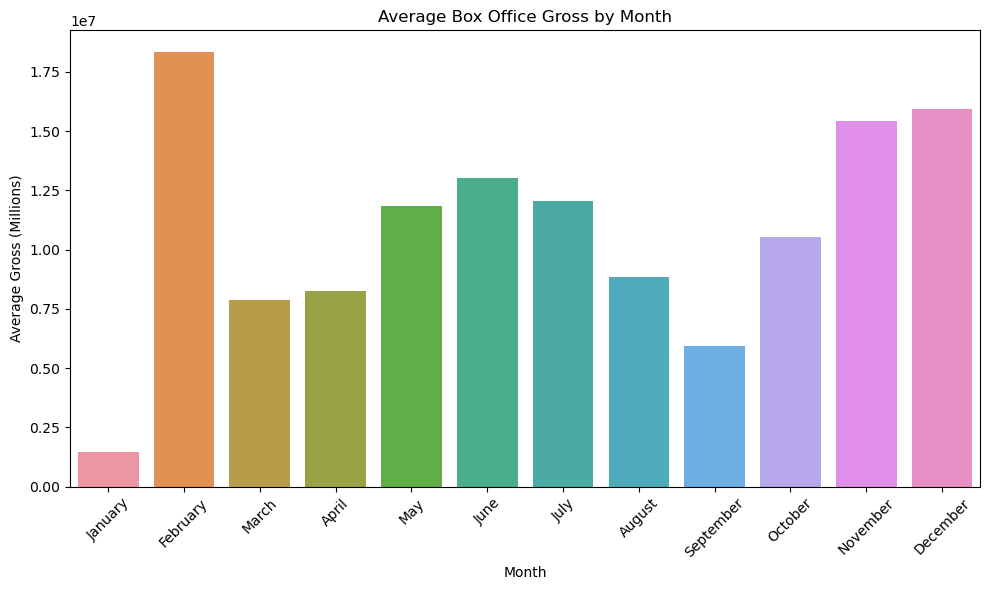

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))

sns.barplot(
    x='month_name',
    y='avg_gross',
    data=monthly_stats
)

plt.title('Average Box Office Gross by Month')
plt.xlabel('Month')
plt.ylabel('Average Gross (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations**

The bar chart shows the average box office gross by month.
February has the highest average gross earnings.
November and December has a relatively consistent high average gross. This maybe due to festive season and holidays hence availability of audience.


In [ ]:

#Filter for February movies that actually have box office data
feb_movies = RT_Movie_Data[
    (RT_Movie_Data['theater_date'].dt.month == 2) & 
    (RT_Movie_Data['box_office'] > 0)
].copy()

#Split the genres (because "Comedy|Romance" should count for both)
#We use .explode() to separate them into individual rows
feb_movies['genre'] = feb_movies['genre'].str.split('|')
feb_movies_exploded = feb_movies.explode('genre')

#Calculate the average box office per genre
best_feb_genres = feb_movies_exploded.groupby('genre')['box_office'].mean().sort_values(ascending=False)

#View the results
best_feb_genres.head()

genre
Romance                 6.852093e+07
Comedy                  6.526616e+07
Drama                   5.391214e+07
Mystery and Suspense    3.072480e+07
Horror                  3.045666e+07
Name: box_office, dtype: float64

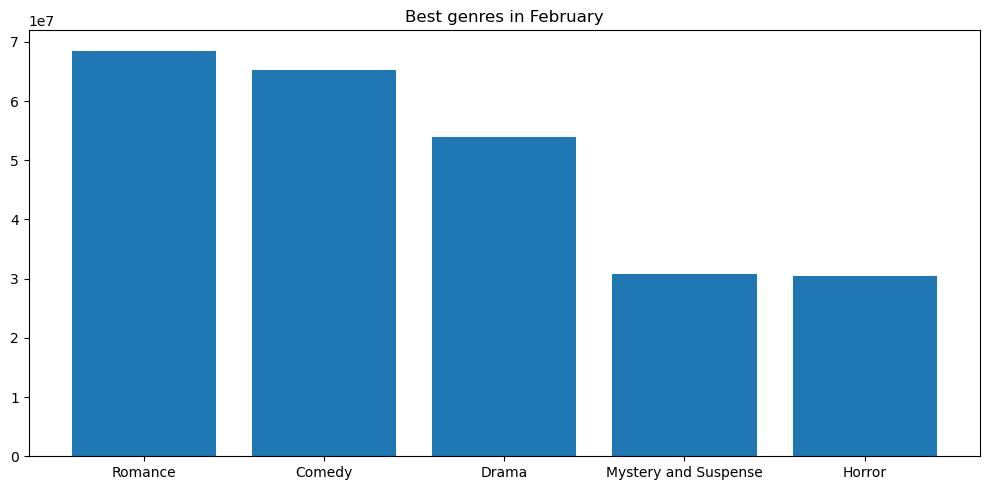

In [ ]:
top_5 = best_feb_genres.head()

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(top_5.index, top_5.values)
ax.set_title("Best genres in February")

plt.tight_layout()
plt.show()


Romance is the best performing genre in February. This is likely due to Valentine’s Day, when audiences favor romantic films.